In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA

Загружаю данные, смотрю наличие пустых измерений

In [149]:
#Read Excel file in pandas
df = pd.read_excel('C:/Users/admin/Documents/Corrected_CVD.xlsx')
print(df.isnull().sum())
df['Group'].value_counts()

Number                    0
3-OH Anthranillic acid    0
5-hydroxytryptophan       0
5-Methoxytryptamine       0
Adenosin                  0
                         ..
C6                        0
C6-DC                     0
C8                        0
C8-1                      0
Group                     0
Length: 94, dtype: int64


Group
АГ          102
ИБС          80
Контроль     77
Name: count, dtype: int64

Отбираю только subgroup содержащий "Markin". Вручную убираю пустые столбцы.
Затем меняю ['Control','AMI', 'IHD'] на [0,1,2]
Смотрю по кол-ву на каждую группу людей, с исходными данными совпадает.
Выходят предупреждения, пока не понял, как исправить.

In [150]:
markin = df
markin.drop('Number', axis=1, inplace=True)

#Replace ['Control','AMI', 'IHD'] to [0,1,2] respectively
markin['Group'].replace(['Контроль','АГ', 'ИБС'],[0,1,2],inplace=True)

print('Control', sum(markin['Group'] == 0),\
        '\nAMI', sum(markin['Group'] == 1),\
        '\nIHD', sum(markin['Group'] == 2))

Control 77 
AMI 102 
IHD 80


In [6]:
# #How to save file as csv in directory
# markin.to_csv('MARKIN_CARDIO.csv', index=False)

Разделяю данные на параметры и значения.
Пустые измерения меняю на среднее (Медиана заменить, на основе соседних значений)

In [151]:
#Select rows where group 1 and 0
markin = markin[markin['Group'].isin([0,2])]
x = markin.iloc[:,:-1]
y = markin.iloc[:, -1]  # Selecting the last column of the DataFrame markin
data = pd.concat([y,x],axis=1)
data = pd.DataFrame(markin, columns=data.columns)
#Change float to int in column
data['Group'] = data['Group'].astype(int)
y = y.astype(int)
y.value_counts()

Group
2    80
0    77
Name: count, dtype: int64

In [110]:


# Check the class distribution after oversampling
print("Class distribution after oversampling:")
print(pd.Series(y_train).value_counts())

Class distribution after oversampling:
Group
0    81
1    81
Name: count, dtype: int64


Пока я только смотрел, как детектировать выбросы, буду ещё изучать.

PCA (Metaboanalyst. Preproccesing: нормализованные данные как здесь)

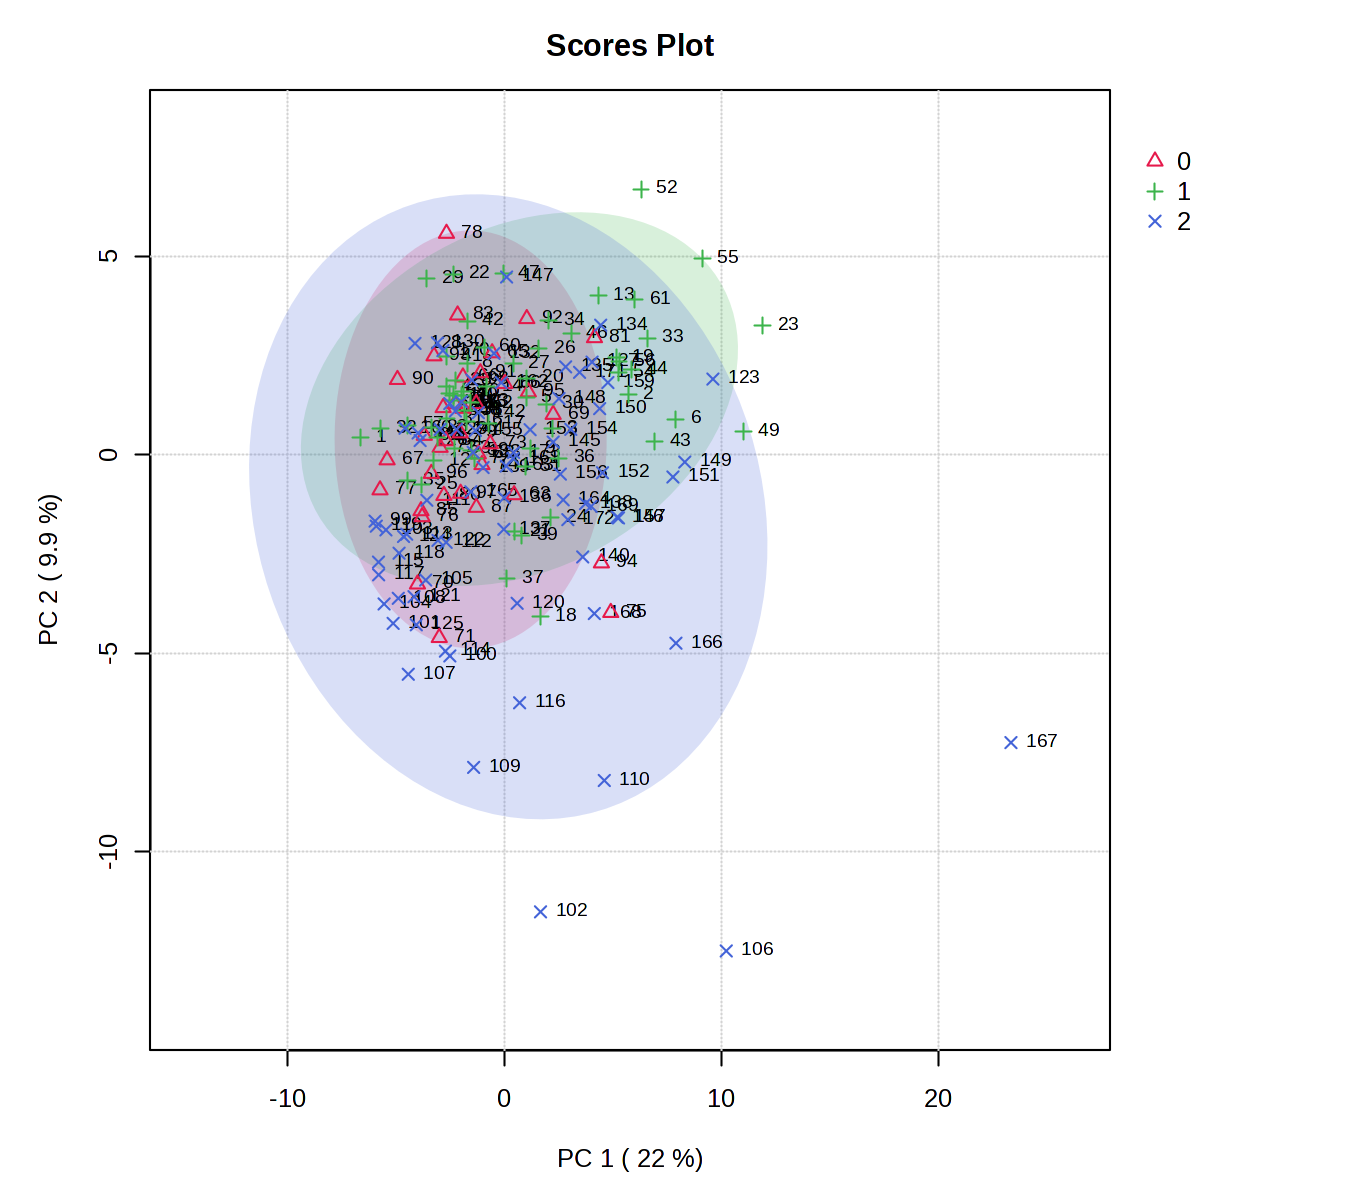

Random forest outliers (Metaboanalyst. Preproccesing: нормализованные данные как здесь) Нужно посмотреть разные способы

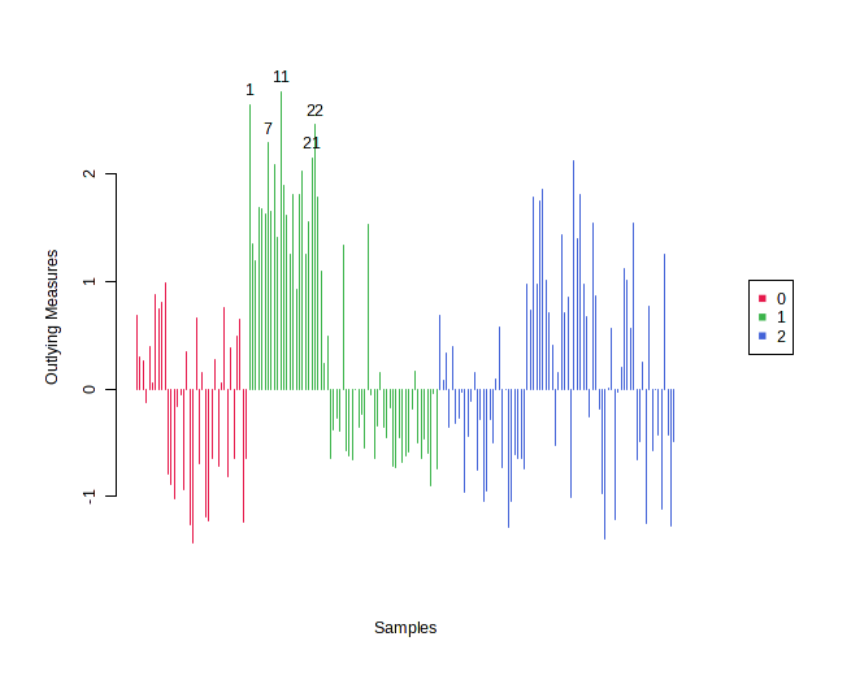

markin_norm = pd.concat([y,x_norm],axis=1)
import pandas as pd

import pandas as pd

# Добавление столбца слева
markin_norm.insert(0, 'ID', range(1, len(markin_norm) + 1))


In [8]:
# #Scaling the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_norm = sc.fit_transform(x)
# x_norm = pd.DataFrame(x_norm, columns=x.columns)

In [9]:
# markin_norm = pd.concat([y,x_norm],axis=1)
# import pandas as pd

# import pandas as pd

# # Добавление столбца слева
# markin_norm.insert(0, 'ID', range(1, len(markin_norm) + 1))

In [10]:
# markin_norm.to_csv('MARKIN_NORM.csv', index=False)

Разделение на x_train, x_test, y_train, y_test 

In [152]:
x_norm = x
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_norm,y,test_size=0.2,random_state=0)

from imblearn.over_sampling import RandomOverSampler

# Create an instance of RandomOverSampler
oversampler = RandomOverSampler(random_state=0)

# Resample the training data
x_train, y_train = oversampler.fit_resample(x_train, y_train)

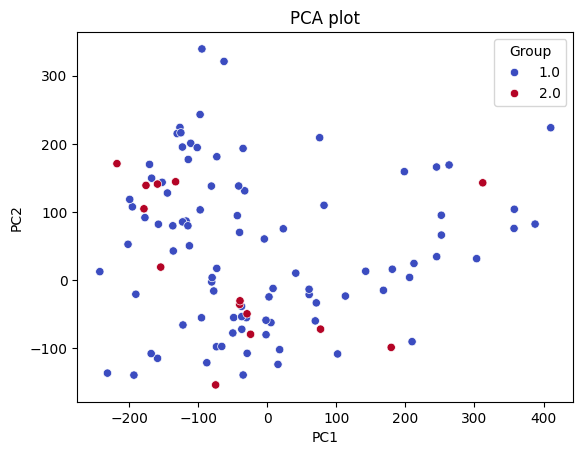

In [90]:
#How to crate PCA plot
from sklearn.decomposition import PCA
pca = PCA(n_components=2, tol=0.95)
pca.fit(x_norm)
X_pca = pca.fit_transform(x_norm)
#PCA plot
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca.head()
plot = sns.scatterplot(x='PC1', y='PC2', data=X_pca,\
    hue=markin['Group'], palette="coolwarm")
plot.set_title('PCA plot')
plot.set_xlabel('PC1')
plot.set_ylabel('PC2')
fig = plot.get_figure()


In [8]:
markin.columns

Index(['3-OH Anthranillic acid', '5-hydroxytryptophan', '5-Methoxytryptamine',
       'Adenosin', 'ADMA', 'Alanine', 'Antranillic acid', 'Arginine',
       'Asparagine', 'Aspartic acid', 'Betaine', 'Carnosine', 'Choline',
       'Citrulline', 'Cortisol', 'Creatinine', 'Cytidine', 'DMG', 'Dopamine',
       'Epinephrine', 'Glutamic acid', 'Glutamine', 'Glycine', 'HIAA',
       'Histamine', 'Histidine', 'Homoarginine', 'Hydroxyproline',
       'Indole-3-acetic acid', 'Indole-3-butyric', 'Indole-3-carboxaldehyde',
       'Indole-3-lactic acid', 'Indole-3-propionic acid', 'Kynurenic acid',
       'Kynurenine', 'Leucine', 'Lysine', 'Melatonin', 'Metanephrine',
       'Methinine-Sulfoxide', 'Methionine', 'Methylhistidine',
       'Norepinephrine', 'Normetanephrine', 'Ornitine', 'Pantothenic acid',
       'Phenylalanine', 'Proline', 'Quinolinic acid', 'Riboflavin', 'Serine',
       'Serotonin', 'Taurine', 'Threonine', 'TMAO', 'TotalDMA', 'Tryptamine',
       'Tryptophan', 'Tyrosin', 'Uridine',

In [14]:
# markin_norm = pd.concat([y,x_norm],axis=1)
# import pandas as pd

# import pandas as pd

# # Добавление столбца слева
# markin_norm.insert(0, 'ID', range(1, len(markin_norm) + 1))

По перечисленным методам смотрю эффективность на train и test. Добавил кросс-валидацию методом StratifiedKFold (10 разделений)

In [145]:
#Performing models
models ={
    'Decision Tree':DecisionTreeClassifier(random_state=0),
    'Random Forest':RandomForestClassifier(random_state=1),
    'KNN':KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=0),
    'SVM': SVC(random_state=0)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    skfold=StratifiedKFold(n_splits=10)
    scores = cross_val_score(model, x_norm, y, cv=skfold)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
        #Test performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test,y_test_pred, average='weighted')
    model_test_f1 = f1_score(y_test,y_test_pred, average='weighted')

        #Train performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_precision = precision_score(y_train,y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train,y_train_pred, average='weighted')
    model_train_f1 = f1_score(y_train,y_train_pred, average='weighted')
   
    print('='*35)
    print(list(models.keys())[i])

    print("CV mean score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print('='*35)

    print('Model performance for Training set:')
    print('Accuracy: {:.4f}'.format(model_train_accuracy))
    print('F1 Score: {:.4f}'.format(model_train_f1))
    print('Precision: {:.4f}'.format(model_train_precision))
    print('Recall: {:.4f}'.format(model_train_recall))

    print('-'*35)

    print('Model performance for Test set:')
    print('Accuracy: {:.4f}'.format(model_test_accuracy))
    print('F1 Score: {:.4f}'.format(model_test_f1))
    print('Precision: {:.4f}'.format(model_test_precision))
    print('Recall: {:.4f}'.format(model_test_recall))

    print('='*35)
    print('\n')


Decision Tree
CV mean score: 0.79 (+/- 0.18)
Model performance for Training set:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
-----------------------------------
Model performance for Test set:
Accuracy: 0.7778
F1 Score: 0.7792
Precision: 0.7998
Recall: 0.7778


Random Forest
CV mean score: 0.84 (+/- 0.19)
Model performance for Training set:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
-----------------------------------
Model performance for Test set:
Accuracy: 0.8611
F1 Score: 0.8603
Precision: 0.8609
Recall: 0.8611


KNN
CV mean score: 0.70 (+/- 0.28)
Model performance for Training set:
Accuracy: 0.8765
F1 Score: 0.8765
Precision: 0.8768
Recall: 0.8765
-----------------------------------
Model performance for Test set:
Accuracy: 0.5556
F1 Score: 0.5583
Precision: 0.5645
Recall: 0.5556


Gradient Boosting
CV mean score: 0.87 (+/- 0.11)
Model performance for Training set:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
---

Задаю список гиперпараметров для проверки

In [10]:
#Hyperparamenter Training
rf_params = {'max_depth': [5,8,15, None, 10],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [50, 100, 200, 500],
              'criterion':  ['gini', 'entropy'],
              'min_samples_leaf': [1, 2, 4],
              'class_weight': ['balanced', None]}
dt_params = { 'max_depth': [5,8,15, None, 10],
              'min_samples_split': [2, 5, 10],
              'max_leaf_nodes': [5, 10, 20],
              'min_samples_leaf': [1, 2, 4],
              'criterion':  ['gini', 'entropy']}
KNN_params = {'n_neighbors': [3,5,10],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2],
              'metric': ['euclidean', 'manhattan'],
              'leaf_size': [20, 50, 100]}
GB_params = {'max_depth': [3,5,8,15, None],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [50, 100, 200, 500],
              'loss': ['log_loss'],
              'criterion':  ['squared_error', 'friedman_mse'],
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'max_leaf_nodes': [5, 10, 20]}
svc_params = {'C': [1, 10, 100, 1000],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto'],
              'decision_function_shape': ['ovo', 'ovr'],
              'class_weight': ['balanced', None]}
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}


In [11]:
randomcv_models = [
                    ('RF', RandomForestClassifier(), rf_params),
                    ('DT', DecisionTreeClassifier(), dt_params),
                    ('KNN', KNeighborsClassifier(), KNN_params),
                    ('GB', GradientBoostingClassifier(), GB_params),
                    ('SVM', SVC(), svc_params)
                    ]

RandomizedSearchCV для подбора оптимальных параметров для каждой модели

In [12]:
#RandomizedSearchCV hyperparameters pulling methods 
model_param = {}
for name,model,params in randomcv_models:
    random = RandomizedSearchCV(estimator = model,\
                                param_distributions = params,\
                                cv =3,\
                                verbose=2,\
                                n_jobs=-1)
    random.fit(x_train,y_train)
    model_param[name] = random.best_params_
    
for model_name in model_param:
    print(f"---------Best Params for {model_name}---------")
    print(model_param[model_name])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits


d:\Python\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Python\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Python\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "d:\Python\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "d:\Python\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constrai

Fitting 3 folds for each of 10 candidates, totalling 30 fits
---------Best Params for RF---------
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 15, 'criterion': 'entropy', 'class_weight': None}
---------Best Params for DT---------
{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': 20, 'max_depth': 15, 'criterion': 'gini'}
---------Best Params for KNN---------
{'weights': 'uniform', 'p': 1, 'n_neighbors': 10, 'metric': 'euclidean', 'leaf_size': 100, 'algorithm': 'ball_tree'}
---------Best Params for GB---------
{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': 20, 'max_features': 'sqrt', 'max_depth': None, 'loss': 'log_loss', 'criterion': 'friedman_mse'}
---------Best Params for SVM---------
{'kernel': 'sigmoid', 'gamma': 'scale', 'decision_function_shape': 'ovr', 'class_weight': 'balanced', 'C': 1}


Смотрю, как эти гипепараметры повлияли на эффективность моделей

In [153]:
#Performing models
models ={
    'Random Forest':RandomForestClassifier(random_state = 0, n_estimators = 500, min_samples_split= 2),
    'Decision Tree':DecisionTreeClassifier(random_state = 0, max_depth = 10, min_samples_split= 5,max_leaf_nodes= 20),
    'KNN':KNeighborsClassifier(weights = 'distance', n_neighbors = 10, algorithm = 'auto', p = 1, metric = 'euclidean', leaf_size = 20),
    'Gradient Boosting':GradientBoostingClassifier(n_estimators= 50, min_samples_split=2, loss = 'log_loss', max_depth = 8, min_samples_leaf = 1),
    'SVM': SVC(random_state = 0, C = 1, gamma = 'scale', kernel = 'rbf', decision_function_shape = 'ovo', class_weight = 'balanced'),
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    skfold=StratifiedKFold(n_splits=10)
    scores = cross_val_score(model, x_norm, y, cv=skfold)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
        #Test performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test,y_test_pred, average='weighted')
    model_test_f1 = f1_score(y_test,y_test_pred, average='weighted')

        #Train performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_precision = precision_score(y_train,y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train,y_train_pred, average='weighted')
    model_train_f1 = f1_score(y_train,y_train_pred, average='weighted')
    
    print('='*35)
    print(list(models.keys())[i])

    print("CV mean score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

    print('-'*35)

    print('Model performance for Training set:')
    print('Accuracy: {:.4f}'.format(model_train_accuracy))
    print('F1 Score: {:.4f}'.format(model_train_f1))
    print('Precision: {:.4f}'.format(model_train_precision))
    print('Recall: {:.4f}'.format(model_train_recall))

    print('-'*35)

    print('Model performance for Test set:')
    print('Accuracy: {:.4f}'.format(model_test_accuracy))
    print('F1 Score: {:.4f}'.format(model_test_f1))
    print('Precision: {:.4f}'.format(model_test_precision))
    print('Recall: {:.4f}'.format(model_test_recall))

    print('='*35)
    print('\n')

Random Forest
CV mean score: 0.99 (+/- 0.05)
-----------------------------------
Model performance for Training set:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
-----------------------------------
Model performance for Test set:
Accuracy: 0.9688
F1 Score: 0.9688
Precision: 0.9707
Recall: 0.9688


Decision Tree
CV mean score: 0.93 (+/- 0.22)
-----------------------------------
Model performance for Training set:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
-----------------------------------
Model performance for Test set:
Accuracy: 0.9375
F1 Score: 0.9375
Precision: 0.9375
Recall: 0.9375


KNN
CV mean score: 0.76 (+/- 0.15)
-----------------------------------
Model performance for Training set:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
-----------------------------------
Model performance for Test set:
Accuracy: 0.7500
F1 Score: 0.7379
Precision: 0.8370
Recall: 0.7500


Gradient Boosting
CV mean score: 0.93 (+/- 0.20

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression model
logistic_model = LogisticRegression(random_state=0, max_iter=10000)

# Define the hyperparameters grid for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
}

# Perform Grid Search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best hyperparameters:", best_params)

Best hyperparameters: {'C': 0.001, 'penalty': 'l2'}


d:\Python\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Python\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Python\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
         

In [137]:
from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression model
logistic_model = LogisticRegression(random_state=0, max_iter=10000, C=0.01, penalty='l2')

# Fit the logistic regression model on the training data
logistic_model.fit(x_train, y_train)

# Cross-validation
skfold = StratifiedKFold(n_splits=10)
scores = cross_val_score(logistic_model, x_norm, y, cv=skfold)

# Predictions
y_train_pred = logistic_model.predict(x_train)
y_test_pred = logistic_model.predict(x_test)

# Test performance
model_test_accuracy = accuracy_score(y_test, y_test_pred)
model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Train performance
model_train_accuracy = accuracy_score(y_train, y_train_pred)
model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')

print('='*35)
print('Logistic Regression')

print("CV mean score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

print('-'*35)

print('Model performance for Training set:')
print('Accuracy: {:.4f}'.format(model_train_accuracy))
print('F1 Score: {:.4f}'.format(model_train_f1))
print('Precision: {:.4f}'.format(model_train_precision))
print('Recall: {:.4f}'.format(model_train_recall))

print('-'*35)

print('Model performance for Test set:')
print('Accuracy: {:.4f}'.format(model_test_accuracy))
print('F1 Score: {:.4f}'.format(model_test_f1))
print('Precision: {:.4f}'.format(model_test_precision))
print('Recall: {:.4f}'.format(model_test_recall))

print('='*35)
print('\n')

Logistic Regression
CV mean score: 0.58 (+/- 0.24)
-----------------------------------
Model performance for Training set:
Accuracy: 0.7927
F1 Score: 0.7924
Precision: 0.7943
Recall: 0.7927
-----------------------------------
Model performance for Test set:
Accuracy: 0.6757
F1 Score: 0.6757
Precision: 0.6757
Recall: 0.6757




In [20]:
gridcv_models = [
                ('RF', RandomForestClassifier(), rf_params),
                ('GB', GradientBoostingClassifier(), GB_params),

]

#GridSearchCV hyperparameters pulling methods 
model_param = {}
for name,model,params in gridcv_models:
    random = GridSearchCV(estimator = model,\
                                param_grid = params,\
                                cv =4,\
                                verbose=2,\
                                n_jobs=-1)
    random.fit(x_train,y_train)
    model_param[name] = random.best_params_
    
for model_name in model_param:
    print(f"---------Best Params for {model_name}---------")
    print(model_param[model_name])


139 min
Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...
Fitting 4 folds for each of 720 candidates, totalling 2880 fits
Fitting 4 folds for each of 3240 candidates, totalling 12960 fits
---------Best Params for RF-------—
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
---------Best Params for GB-------—
{'criterion': 'squared_error', 'loss': 'log_loss', 'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}

In [21]:
#Performing models

Здесь я выбрал две лучшие модели и вручную подобрал гиперпараметры. Добавил кросс-валидацию методом StratifiedKFold (10 разделений)

In [16]:
#Performing models
models ={
    'Random Forest':RandomForestClassifier(random_state = 0, n_estimators = 200,\
                                            min_samples_split= 10),
    'Gradient Boosting':GradientBoostingClassifier(random_state = 0, loss = 'log_loss',\
                                                    n_estimators = 50,
                                                    min_samples_leaf = 1),
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    skfold=StratifiedKFold(n_splits=10)
    scores = cross_val_score(model, x_norm, y, cv=skfold)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
        #Test performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test,y_test_pred, average='weighted')
    model_test_f1 = f1_score(y_test,y_test_pred, average='weighted')

        #Train performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_precision = precision_score(y_train,y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train,y_train_pred, average='weighted')
    model_train_f1 = f1_score(y_train,y_train_pred, average='weighted')
    
    print('='*35)
    print(list(models.keys())[i])

    print("CV mean score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

    print('-'*35)

    print('Model performance for Training set:')
    print('Accuracy: {:.4f}'.format(model_train_accuracy))
    print('F1 Score: {:.4f}'.format(model_train_f1))
    print('Precision: {:.4f}'.format(model_train_precision))
    print('Recall: {:.4f}'.format(model_train_recall))

    print('-'*35)

    print('Model performance for Test set:')
    print('Accuracy: {:.4f}'.format(model_test_accuracy))
    print('F1 Score: {:.4f}'.format(model_test_f1))
    print('Precision: {:.4f}'.format(model_test_precision))
    print('Recall: {:.4f}'.format(model_test_recall))

    print('='*35)
    print('\n')

Random Forest
CV mean score: 0.61 (+/- 0.17)
-----------------------------------
Model performance for Training set:
Accuracy: 0.9952
F1 Score: 0.9952
Precision: 0.9952
Recall: 0.9952
-----------------------------------
Model performance for Test set:
Accuracy: 0.6538
F1 Score: 0.6487
Precision: 0.6469
Recall: 0.6538


Gradient Boosting
CV mean score: 0.60 (+/- 0.13)
-----------------------------------
Model performance for Training set:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
-----------------------------------
Model performance for Test set:
Accuracy: 0.5962
F1 Score: 0.5836
Precision: 0.5851
Recall: 0.5962




In [154]:
GB = KNeighborsClassifier(weights = 'distance', n_neighbors = 10, algorithm = 'auto', p = 1, metric = 'euclidean', leaf_size = 20)
GB.fit(x_train,y_train)
proba = GB.predict_proba(x_test)
predicted = GB.predict(x_test)
proba_r = np.round(proba, decimals=3)
y_test_groups = list(y_test)
for i in range(len(y_test_groups)):
    print('Probability of class {}'.format(proba_r[i]*100))
    print('Predicted class: {}'.format(predicted[i]))
    print('Real class: {}'.format(y_test_groups[i]))
    print('\n')

Probability of class [61.1 38.9]
Predicted class: 0
Real class: 0


Probability of class [39.3 60.7]
Predicted class: 2
Real class: 0


Probability of class [19.7 80.3]
Predicted class: 2
Real class: 2


Probability of class [36.1 63.9]
Predicted class: 2
Real class: 2


Probability of class [51.7 48.3]
Predicted class: 0
Real class: 0


Probability of class [ 8.4 91.6]
Predicted class: 2
Real class: 2


Probability of class [18.4 81.6]
Predicted class: 2
Real class: 2


Probability of class [40.2 59.8]
Predicted class: 2
Real class: 0


Probability of class [ 9.9 90.1]
Predicted class: 2
Real class: 2


Probability of class [29.4 70.6]
Predicted class: 2
Real class: 2


Probability of class [20.7 79.3]
Predicted class: 2
Real class: 0


Probability of class [17.8 82.2]
Predicted class: 2
Real class: 2


Probability of class [53.5 46.5]
Predicted class: 0
Real class: 0


Probability of class [63.1 36.9]
Predicted class: 0
Real class: 0


Probability of class [18. 82.]
Predicted class: 

Confusion Matrix:
[[ 9  8]
 [ 0 15]]


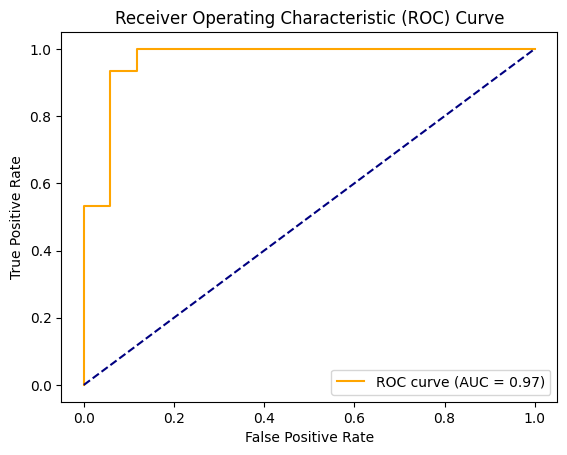

In [157]:
#Calculate the confusion matrix and auc roc curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, predicted)
print("Confusion Matrix:")
print(conf_matrix)
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC score
auc_score = roc_auc_score(y_test, proba[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, proba[:, 1], pos_label=2)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='orange', label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


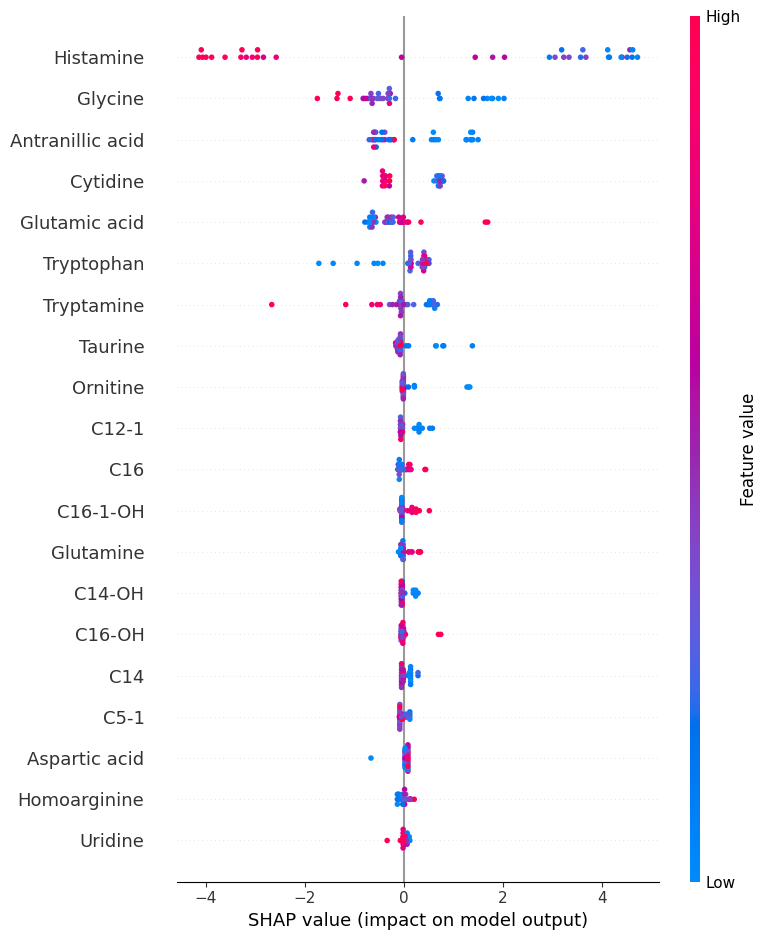

In [123]:
import shap

# Assuming GB is your GradientBoostingClassifier model
explainer = shap.TreeExplainer(GB)
shap_values = explainer.shap_values(x_test)

# Plot the SHAP summary plot for feature importance
shap.summary_plot(shap_values, features=x_test, feature_names=x_test.columns)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression model
logistic_model = LogisticRegression(random_state=0, max_iter=10000, C=0.01, penalty='l2')

# Fit the logistic regression model on the training data
logistic_model.fit(x_train, y_train)

# Cross-validation
skfold = StratifiedKFold(n_splits=10)
scores = cross_val_score(logistic_model, x_norm, y, cv=skfold)

# Predictions
y_train_pred = logistic_model.predict(x_train)
y_test_pred = logistic_model.predict(x_test)

# Test performance
model_test_accuracy = accuracy_score(y_test, y_test_pred)
model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Train performance
model_train_accuracy = accuracy_score(y_train, y_train_pred)
model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')

print('='*35)
print('Logistic Regression')

print("CV mean score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

print('-'*35)

print('Model performance for Training set:')
print('Accuracy: {:.4f}'.format(model_train_accuracy))
print('F1 Score: {:.4f}'.format(model_train_f1))
print('Precision: {:.4f}'.format(model_train_precision))
print('Recall: {:.4f}'.format(model_train_recall))

print('-'*35)

print('Model performance for Test set:')
print('Accuracy: {:.4f}'.format(model_test_accuracy))
print('F1 Score: {:.4f}'.format(model_test_f1))
print('Precision: {:.4f}'.format(model_test_precision))
print('Recall: {:.4f}'.format(model_test_recall))

print('='*35)
print('\n')

Logistic Regression
CV mean score: 0.81 (+/- 0.24)
-----------------------------------
Model performance for Training set:
Accuracy: 0.9321
F1 Score: 0.9321
Precision: 0.9327
Recall: 0.9321
-----------------------------------
Model performance for Test set:
Accuracy: 0.8333
F1 Score: 0.8312
Precision: 0.8344
Recall: 0.8333




In [24]:
import pickle

In [25]:
pickle.dump(GB, open('GrBoost_cardio.pkl', 'wb'))

In [26]:
for i in range(len(y_test_groups)):
    print('Probability of class {}'.format(proba_r[i]*100))

Probability of class [ 0.1 99.8  0.2]
Probability of class [31.2 28.5 40.3]
Probability of class [ 0.   0.2 99.8]
Probability of class [ 0.  99.9  0.1]
Probability of class [14.4  0.6 85. ]
Probability of class [  0.   0. 100.]
Probability of class [ 1.9  2.9 95.2]
Probability of class [ 0.1  0.1 99.8]
Probability of class [ 0.1  0.1 99.8]
Probability of class [ 2.2 97.7  0.1]
Probability of class [39.4  5.3 55.3]
Probability of class [ 2.1  8.2 89.7]
Probability of class [ 0.1  0.5 99.4]
Probability of class [ 1.9  0.2 97.9]
Probability of class [ 0.1  0.  99.8]
Probability of class [66.6  3.3 30.1]
Probability of class [ 0.  99.9  0.1]
Probability of class [ 0.  94.   5.9]
Probability of class [79.3  7.7 13. ]
Probability of class [  0. 100.   0.]
Probability of class [53.8  0.2 45.9]
Probability of class [  0. 100.   0.]
Probability of class [ 3.5 71.4 25.1]
Probability of class [ 7.4  0.2 92.4]
Probability of class [ 0.4 99.1  0.4]
Probability of class [ 0.   0.7 99.3]
Probability 

In [27]:
y_test

54     1
146    2
63     0
55     1
125    2
100    2
7      1
155    2
104    2
89     0
138    2
143    2
5      1
97     2
163    2
93     0
33     1
18     1
61     0
51     1
66     0
37     1
4      1
118    2
60     1
109    2
123    2
139    2
110    2
159    2
26     1
56     1
126    2
45     1
8      1
Name: Group, dtype: int32